In [5]:
import matplotlib.cm as cm  # Importa el módulo de mapas de colores de Matplotlib
import matplotlib.pyplot as plt  # Importa la librería para graficar
import numpy as np  # Importa la librería NumPy para trabajar con arreglos numéricos

In [6]:
from sklearn.cluster import KMeans  # Importa el algoritmo K-means para realizar clustering
from sklearn.datasets import make_blobs  # Para generar muestras de datos
from sklearn.metrics import silhouette_samples, silhouette_score  # Para evaluar la calidad de los clusters

In [7]:
# Genera la muestra de datos con make_blobs
X, y = make_blobs(
    n_samples=500,              # Número de muestras que se dividirán equitativamente entre centros
    n_features=2,               # Número de características por cada muestra
    centers=4,                  # Número de centros
    cluster_std=1,              # Desviación estándar de los centros
    center_box=(-10.0, 10.0),   # Dimensiones de la región cuadrada en la que se generarán los centros
    shuffle=True,               # Dispersa las muestras aleatoriamente
    random_state=1,             # Establece una semilla para reproducibilidad en la generación de datos
)

In [8]:
# Lista con diferentes cantidades de clusters para comparar
range_n_clusters = [2, 3, 4, 5, 6, 7]   # Establece el número de clusters con los que se compararán 
                                        # los resultados del algoritmo K-means


Para n_clusters = 2 El silhouette_score promedio es : 0.7049787496083262
Para n_clusters = 3 El silhouette_score promedio es : 0.5882004012129721
Para n_clusters = 4 El silhouette_score promedio es : 0.6505186632729437
Para n_clusters = 5 El silhouette_score promedio es : 0.561464362648773
Para n_clusters = 6 El silhouette_score promedio es : 0.4857596147013469
Para n_clusters = 7 El silhouette_score promedio es : 0.49731550839901734


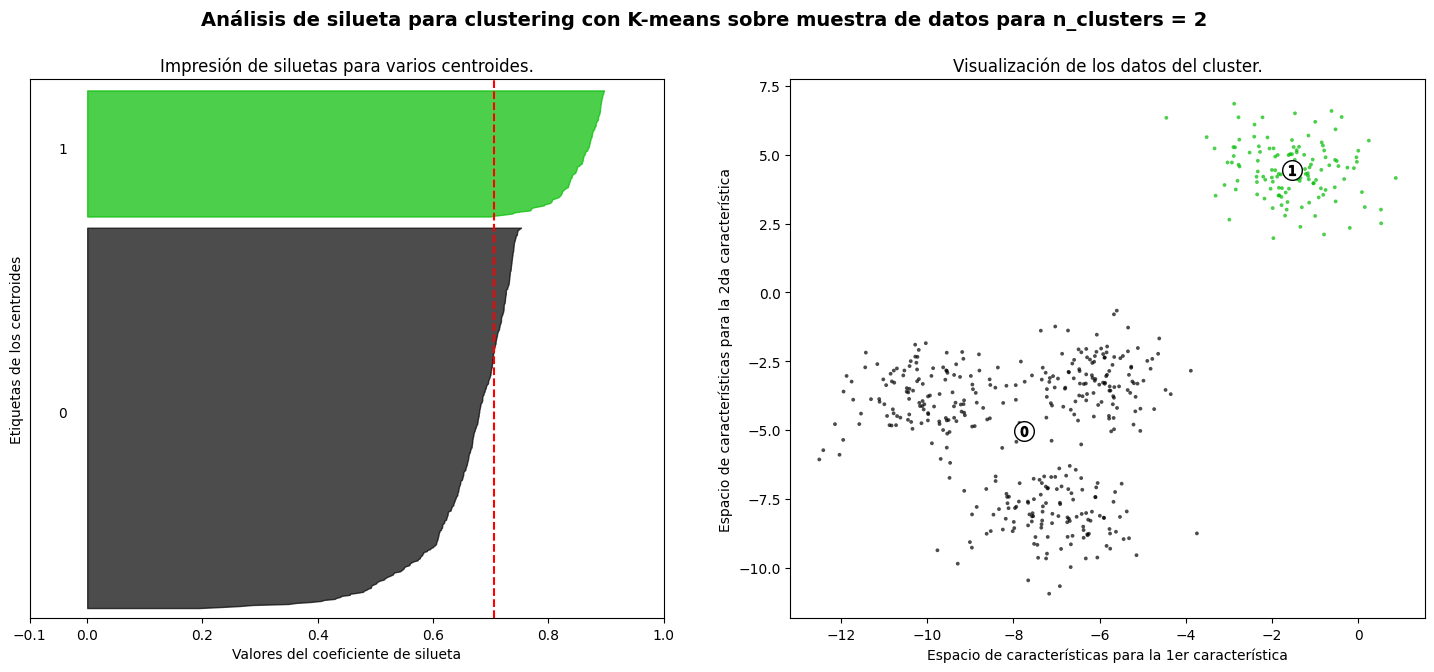

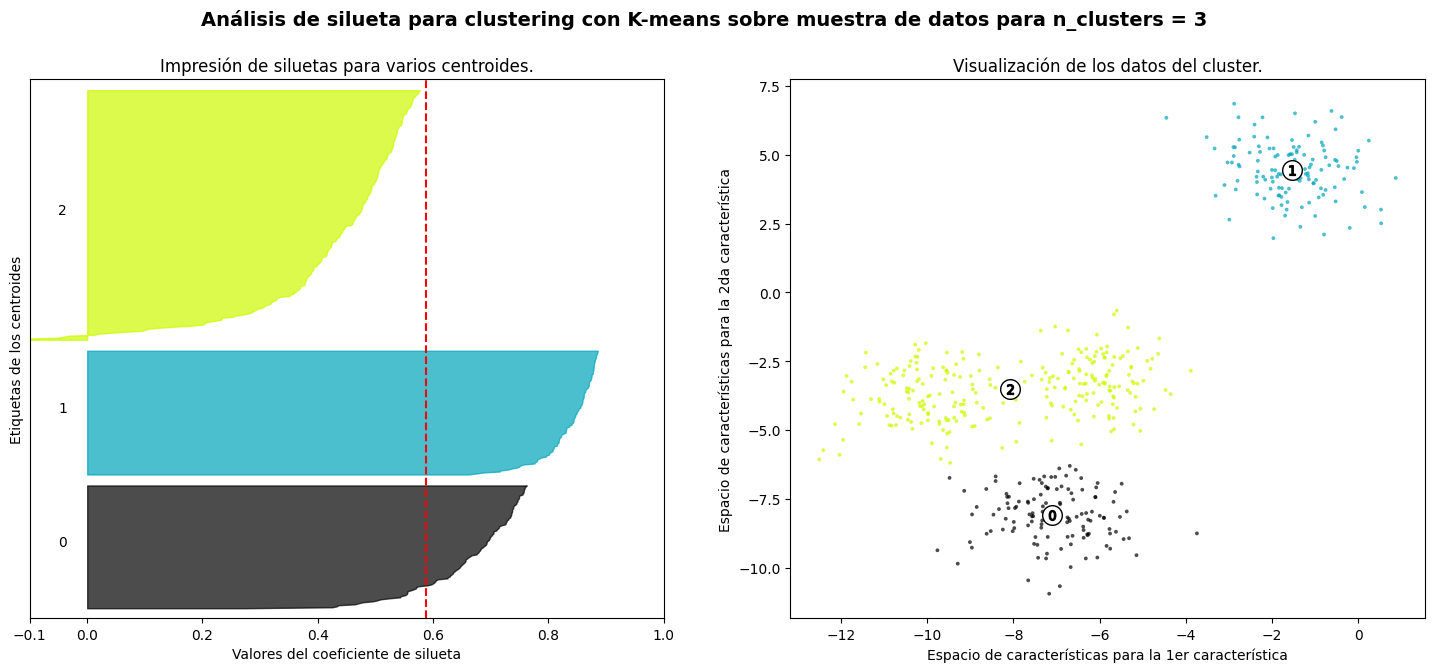

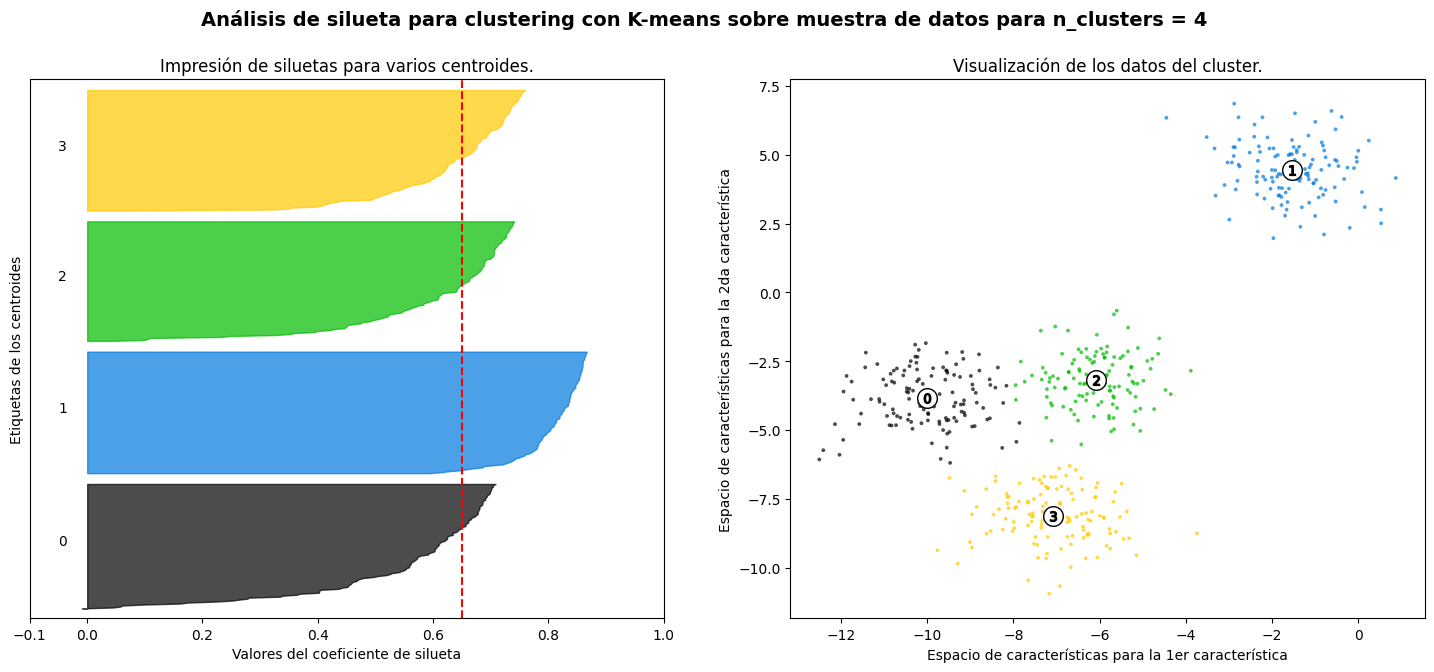

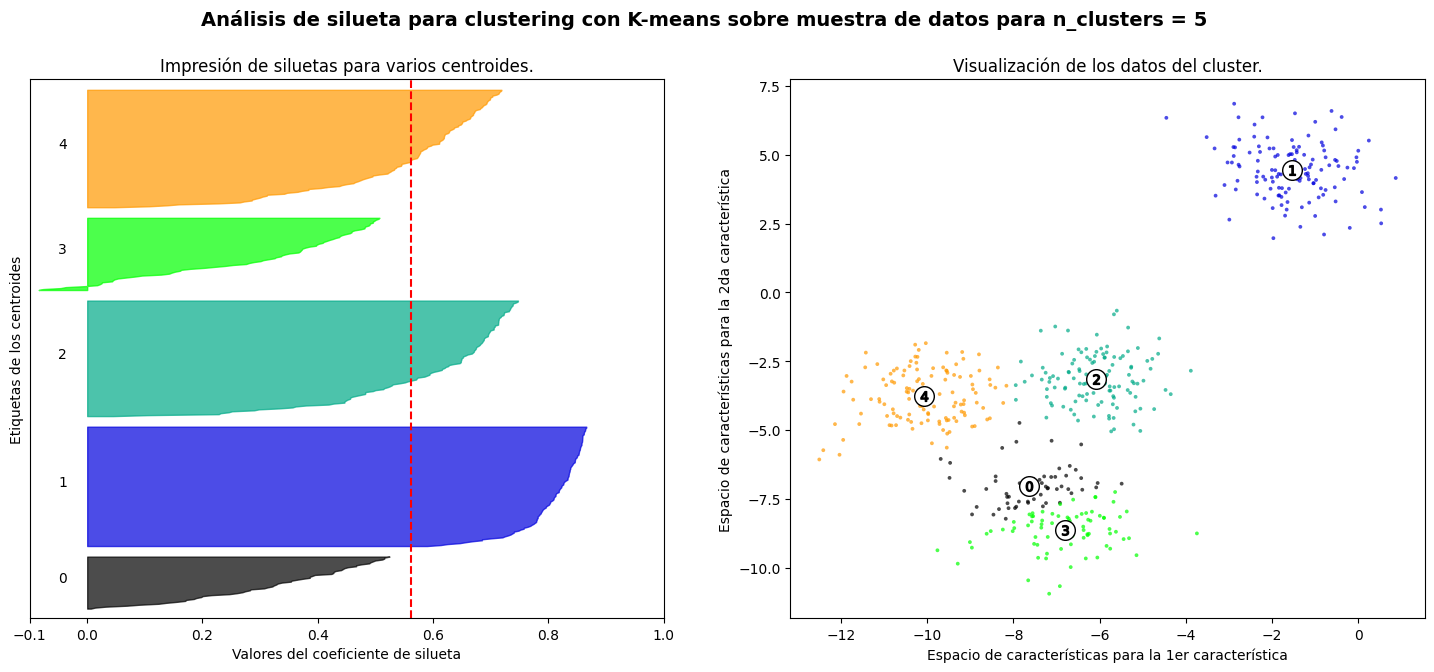

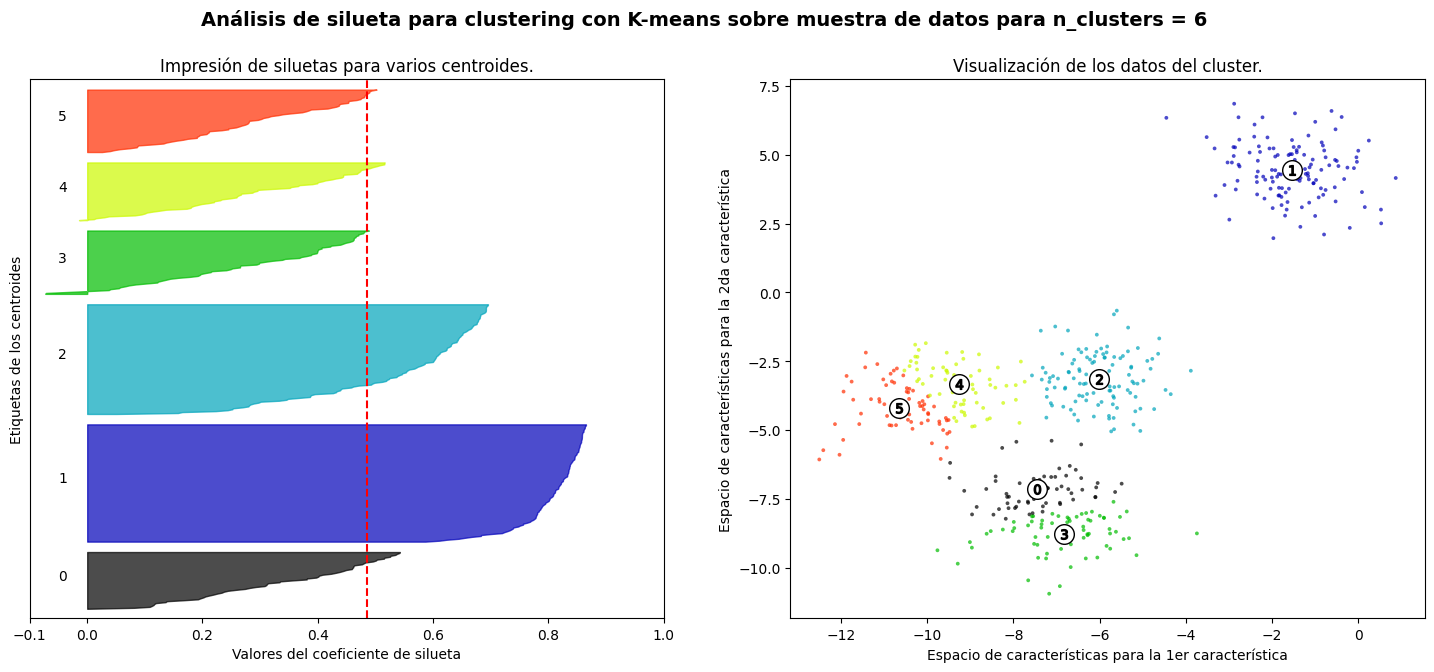

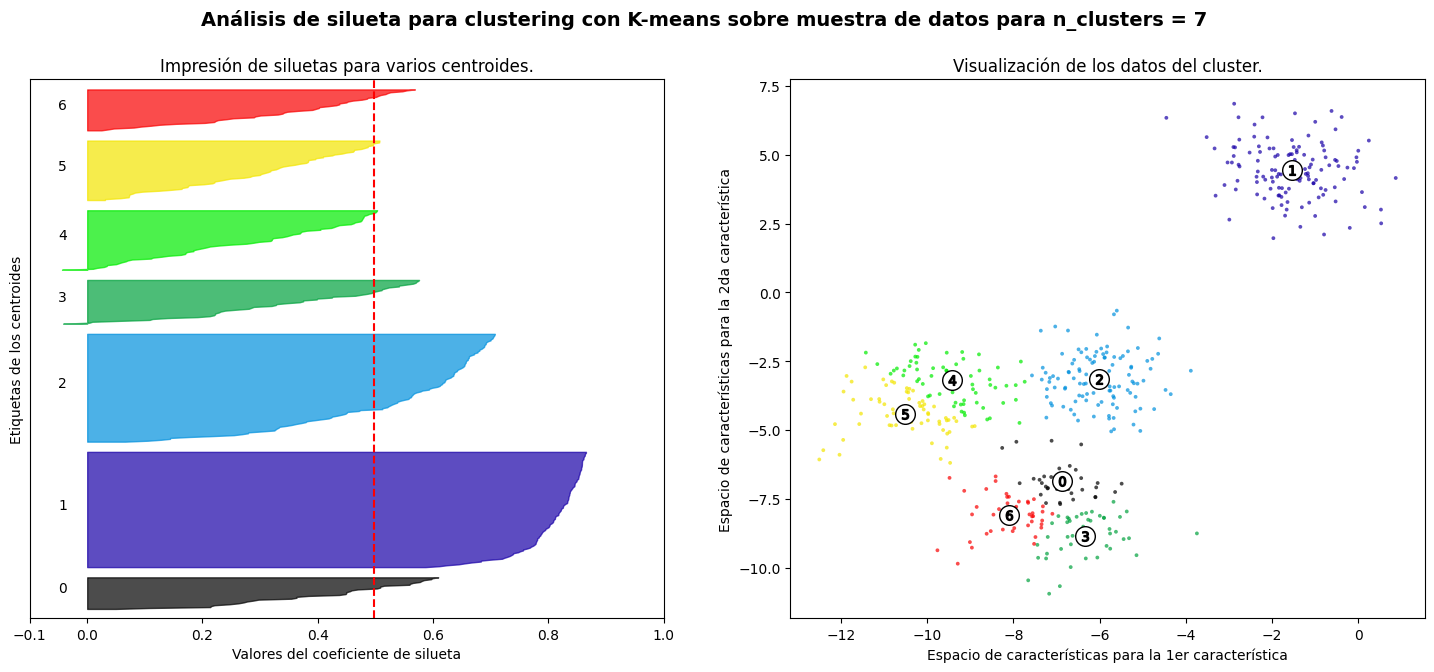

In [9]:
# Inicia el bucle para probar diferentes cantidades de clusters
for n_clusters in range_n_clusters:
    # Crea una figura que contiene dos subgráficos (ax1, ax2)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)  # Establece el tamaño de la figura en pulgadas

    # Configuración del gráfico de siluetas (ax1)
    ax1.set_xlim([-0.1, 1])  # Establece los límites del eje x entre -0.1 y 1
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])  # Establece los límites del eje y para mostrar todas las siluetas

    # Inicializa el algoritmo K-means con el número de clusters actuales
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)  
    cluster_labels = clusterer.fit_predict(X)   # Ajusta el modelo y asigna etiquetas a los datos

    # Calcula el promedio del coeficiente de silueta para la cantidad de clusters actual
    silhouette_avg = silhouette_score(X, cluster_labels)    
    print(
        "Para n_clusters =",  # Imprime el número de clusters actual
        n_clusters,
        "El silhouette_score promedio es :",  # Imprime el promedio del coeficiente de silueta
        silhouette_avg,
    )

    # Calcula los coeficientes de silueta para cada muestra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)    

    y_lower = 10  # Inicializa la variable para posicionar el gráfico de las siluetas
    # Bucle para graficar las siluetas para cada cluster
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]  # Filtra los valores del cluster actual

        ith_cluster_silhouette_values.sort()  # Ordena los valores de silueta del cluster actual

        size_cluster_i = ith_cluster_silhouette_values.shape[0]  # Obtiene el tamaño del cluster actual
        y_upper = y_lower + size_cluster_i  # Calcula el límite superior para graficar las siluetas

        # Asigna un color para el cluster actual
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),  # Rango del eje y para las siluetas
            0,  # Inicio del eje x
            ith_cluster_silhouette_values,  # Valores de las siluetas
            facecolor=color,  # Color de la silueta
            edgecolor=color,  # Color del borde
            alpha=0.7,  # Transparencia
        )

        # Escribe el número del cluster en la mitad de la silueta
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # Actualiza el límite inferior para el siguiente cluster

    # Configura títulos y etiquetas del gráfico de siluetas
    ax1.set_title("Impresión de siluetas para varios centroides.")
    ax1.set_xlabel("Valores del coeficiente de silueta")
    ax1.set_ylabel("Etiquetas de los centroides")

    # Dibuja una línea roja en el promedio del coeficiente de silueta
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Quita las marcas del eje y y ajusta las del eje x
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Segundo gráfico que muestra los clusters formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)  # Asigna colores a cada cluster
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"  # Grafica los puntos de datos
    )

    # Etiqueta los centros de los clusters
    centers = clusterer.cluster_centers_  # Obtiene las coordenadas de los centros de los clusters
    # Dibuja círculos blancos en los centros de los clusters
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    # Dibuja el número de cada cluster en los centros
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    # Configura los títulos y etiquetas del gráfico de clusters
    ax2.set_title("Visualización de los datos del cluster.")
    ax2.set_xlabel("Espacio de características para la 1er característica")
    ax2.set_ylabel("Espacio de características para la 2da característica")

    # Título general de la figura
    plt.suptitle(
        "Análisis de silueta para clustering con K-means sobre muestra de datos para n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

In [10]:
plt.show()